In [1]:
 !git clone https://github.com/xiangwang1223/neural_graph_collaborative_filtering.git

Cloning into 'neural_graph_collaborative_filtering'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 225 (delta 2), reused 0 (delta 0), pack-reused 216
Receiving objects: 100% (225/225), 11.76 MiB | 16.14 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [2]:
def read_file(path):
  f=open(path,'r')
  data=f.readlines()
  return(data)

In [3]:
items_list=read_file('/content/neural_graph_collaborative_filtering/Data/amazon-book/item_list.txt')
user_list=read_file('/content/neural_graph_collaborative_filtering/Data/amazon-book/user_list.txt')

In [4]:
orig_id=[]
remap_id=[]
for i in range(1,len(items_list)):
  orig_id.append(items_list[i].split()[0])
  remap_id.append(items_list[i].split()[1])

In [5]:
import pandas as pd
orig_id_df=pd.DataFrame(orig_id,columns=['orig_id'])
remap_id_df=pd.DataFrame(remap_id,columns=['remap_id'])
items_df=pd.concat([remap_id_df,orig_id_df],axis=1)

In [6]:
#items_df

In [6]:
user_orig_id=[]
user_remap_id=[]
for i in range(1,len(user_list)):
  user_orig_id.append(user_list[i].split()[0])
  user_remap_id.append(user_list[i].split()[1])

In [7]:
import pandas as pd
user_orig_id_df=pd.DataFrame(user_orig_id,columns=['orig_id'])
user_remap_id_df=pd.DataFrame(user_remap_id,columns=['remap_id'])
user_df=pd.concat([user_remap_id_df,user_orig_id_df],axis=1)

In [8]:
#user_df

In [9]:
data_train=read_file('/content/neural_graph_collaborative_filtering/Data/amazon-book/train.txt')
data_test=read_file('/content/neural_graph_collaborative_filtering/Data/amazon-book/test.txt')

In [9]:
len(data_train)

52643

In [10]:
#Using all the 90k odd items is crashing the RAM hence restrict to 10k
n_users=1000
n_items=10000

In [11]:
import numpy as np
X_matrix=np.zeros((n_users,10000))
y_matrix=np.zeros((n_users,10000))

In [11]:
#Making Data Train, Data Test
for i in range(len(data_train)):
  data_train[i]=data_train[i].split()
  for j in range(len(data_train[i])):
    data_train[i][j]=int(data_train[i][j])

for i in range(len(data_test)):
  data_test[i]=data_test[i].split()
  for j in range(len(data_test[i])):
    data_test[i][j]=int(data_test[i][j])    

In [13]:
import random
import numpy as np
np.random.randint(1,1000)

363

In [49]:
user_lis=[]
item_lis=[]
rating=[]
for i in range(1000):
  for j in range(1,len(data_train[i])):
    if(data_train[i][j]<10000):
      user_lis.append(i)
      item_lis.append(data_train[i][j])
      rating.append(1)

In [50]:
len(user_lis),len(item_lis)

(50592, 50592)

In [51]:
for i in range(1000):
  for j in range(1,len(data_train[i])):
    temp=np.random.randint(0,max(data_train[i]))
    if( temp not in data_train[i][1:] and temp<10000):
      #print('Hi')
      user_lis.append(i)
      item_lis.append(temp)
      rating.append(0)

In [52]:
len(user_lis),len(item_lis)

(96163, 96163)

In [53]:
user_lis_test=[]
item_lis_test=[]
rating_test=[]
for i in range(1000):
  for j in range(1,len(data_test[i])):
    if(data_test[i][j]< 10000):
      user_lis_test.append(i)
      item_lis_test.append(data_test[i][j])
      rating_test.append(1)

In [54]:
len(user_lis_test),len(item_lis_test)

(8898, 8898)

In [55]:
for i in range(1000):
  for j in range(1,len(data_test[i])):
    temp=np.random.randint(0,max(data_test[i]))
    if( temp not in data_test[i][1:] and temp<10000):
      #print('Hi')
      user_lis_test.append(i)
      item_lis_test.append(temp)
      rating_test.append(0)

In [56]:
len(user_lis_test),len(item_lis_test)

(13871, 13871)

In [57]:
net_user=user_lis+user_lis_test
net_item=item_lis+item_lis_test
net_rating=rating+rating_test

In [58]:
net_user_df=pd.DataFrame(net_user,columns=['user'])
net_item_df=pd.DataFrame(net_item,columns=['item'])
net_rating_df=pd.DataFrame(net_rating,columns=['rating'])

In [59]:
ratings=pd.concat([net_user_df,net_item_df,net_rating_df],axis=1)

In [60]:
ratings

,user,item,rating
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1
...,...,...,...
110029,998,3925,0
110030,998,888,0
110031,998,5024,0
110032,999,3843,0


In [63]:
X = ratings[['user', 'item']].values
y = ratings['rating'].values
X,y

(array([[   0,    0],
        [   0,    1],
        [   0,    2],
        ...,
        [ 998, 5024],
        [ 999, 3843],
        [ 999, 6892]]), array([1, 1, 1, ..., 0, 0, 0]))

In [65]:
X_train=X[:96163]
y_train=y[:96163]
X_test=X[96163:]
y_test=y[96163:]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96163, 2), (13871, 2), (96163,), (13871,))

In [13]:
#@title not needed
#Filling X_matrix and y_matrix
for i in range(n_users):
  for j in data_train[i][1:]:
    if(j<10000):
      X_matrix[i][j]=1

for i in range(n_users):
  for j in data_test[i][1:]:
    if(j<10000):
      y_matrix[i][j]=1

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_matrix,y_matrix,test_size=0.2,random_state=42)      

In [75]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [92]:
from keras.layers import LSTM,Dense,Embedding,Conv1D,Reshape,Dot,Add,Activation
from keras.layers import LeakyReLU,ReLU
from keras.optimizers import Adam 
from keras.models import Model,Input
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

In [70]:
n_users=1000
n_movies=10000

In [87]:
user=Input(shape=(1,))
u=Embedding(n_users,256,embeddings_initializer='he_uniform')(user)
u=Reshape((256,))(u)
ub=Embedding(n_users,1,embeddings_initializer='he_uniform')(user)
ub=Reshape((1,))(ub)

movie=Input(shape=(1,))
m=Embedding(n_movies,256,embeddings_initializer='he_uniform')(movie)
m=Reshape((256,))(m)

mb=Embedding(n_movies,1,embeddings_initializer='he_uniform')(movie)
mb=Reshape((1,))(mb)

x=Dot(axes=1)([u,m])
x = Add()([x, ub, mb])
x = Activation('sigmoid')(x)

#x=Conv1D(256,kernel_size=3,padding='valid')(x)
#x=LSTM(512,recurrent_initializer='glorot_uniform')([x ub mb])
#x=Dense(64,activation='relu')(x)
#out=Dense(1,activation='sigmoid')(x)

model=Model(inputs=[user, movie] ,outputs=[x])
model.compile(optimizer=Adam(lr=0.001),loss='mean_squared_error')
model.summary()




Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_30 (Embedding)        (None, 1, 256)       256000      input_17[0][0]                   
__________________________________________________________________________________________________
embedding_32 (Embedding)        (None, 1, 256)       2560000     input_18[0][0]                   
____________________________________________________________________________________________

In [88]:
model.fit(X_train_array,y_train,batch_size=32,epochs=5, verbose=1 ,validation_data=(X_test_array,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 96163 samples, validate on 13871 samples
Epoch 1/5
96163/96163 [==============================] - 103s 1ms/step - loss: 0.2320 - val_loss: 0.2147
Epoch 2/5
96163/96163 [==============================] - 102s 1ms/step - loss: 0.0993 - val_loss: 0.1962
Epoch 3/5
96163/96163 [==============================] - 103s 1ms/step - loss: 0.0170 - val_loss: 0.1981
Epoch 4/5
96163/96163 [==============================] - 103s 1ms/step - loss: 0.0025 - val_loss: 0.1989
Epoch 5/5
96163/96163 [==============================] - 105s 1ms/step - loss: 4.5323e-04 - val_loss: 0.2010


In [93]:
#Direct Dot product similarity between Movies and Users
def RecommenderV1(n_users, n_movies, n_factors):
    user = Input(shape=(1,))
    u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
    u = Reshape((n_factors,))(u)
    
    movie = Input(shape=(1,))
    m = Embedding(n_movies, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(movie)
    m = Reshape((n_factors,))(m)
    
    x = Dot(axes=1)([u, m])
    model = Model(inputs=[user, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [94]:
model = RecommenderV1(n_users, n_movies, n_factors=256)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_34 (Embedding)        (None, 1, 256)       256000      input_20[0][0]                   
__________________________________________________________________________________________________
embedding_35 (Embedding)        (None, 1, 256)       2560000     input_21[0][0]                   
____________________________________________________________________________________________

In [95]:
historyV1 = model.fit(x=X_train_array, y=y_train, batch_size=64, epochs=5,
                    verbose=1, validation_data=(X_test_array, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 96163 samples, validate on 13871 samples
Epoch 1/5
96163/96163 [==============================] - 67s 695us/step - loss: 0.4245 - val_loss: 0.2775
Epoch 2/5
96163/96163 [==============================] - 65s 681us/step - loss: 0.1121 - val_loss: 0.2384
Epoch 3/5
96163/96163 [==============================] - 64s 666us/step - loss: 0.0344 - val_loss: 0.2409
Epoch 4/5
96163/96163 [==============================] - 64s 663us/step - loss: 0.0276 - val_loss: 0.2431
Epoch 5/5
96163/96163 [==============================] - 64s 667us/step - loss: 0.0383 - val_loss: 0.2442


In [96]:
#Adding Bias to the Embedding layers and Concatenating The dot product with individual vectors
from keras.layers import Add, Activation, Lambda

class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal',
                      embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        return x

#Concat the user and movie matrix and pass into Dense layers
from keras.layers import Concatenate, Dense, Dropout
def RecommenderNet(n_users, n_movies, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    
    movie = Input(shape=(1,))
    m = EmbeddingLayer(n_movies, n_factors)(movie)
    
    x = Concatenate()([u, m])
    x = Dropout(0.05)(x)
    
    x = Dense(10, kernel_initializer='he_normal')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
    model = Model(inputs=[user, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [97]:
model = RecommenderNet(n_users, n_movies, n_factors=256, min_rating=0, max_rating=1)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_36 (Embedding)        (None, 1, 256)       256000      input_22[0][0]                   
__________________________________________________________________________________________________
embedding_37 (Embedding)        (None, 1, 256)       2560000     input_23[0][0]                   
____________________________________________________________________________________________

In [98]:
history = model.fit(x=X_train_array, y=y_train, batch_size=64, epochs=5,
                    verbose=1, validation_data=(X_test_array, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 96163 samples, validate on 13871 samples
Epoch 1/5
96163/96163 [==============================] - 65s 675us/step - loss: 0.2327 - val_loss: 0.2188
Epoch 2/5
96163/96163 [==============================] - 67s 693us/step - loss: 0.2090 - val_loss: 0.2202
Epoch 3/5
96163/96163 [==============================] - 67s 692us/step - loss: 0.1989 - val_loss: 0.2229
Epoch 4/5
96163/96163 [==============================] - 68s 702us/step - loss: 0.1938 - val_loss: 0.2271
Epoch 5/5
96163/96163 [==============================] - 67s 700us/step - loss: 0.1901 - val_loss: 0.2315


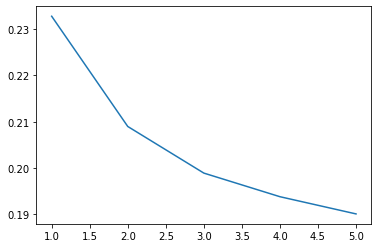

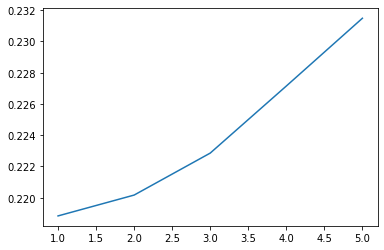

In [100]:
import matplotlib.pyplot as plt
epochs=np.arange(1,6)
plt.figure(1)
plt.plot(epochs,history.history['loss'])
plt.figure(2)
plt.plot(epochs,history.history['val_loss'])

In [115]:
#RNN based network instead of Dense layer
from keras.layers import Concatenate, Dense, Dropout,LSTM
def RecommenderRNN(n_users, n_movies, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = Embedding(n_users, n_factors)(user)
    
    movie = Input(shape=(1,))
    m = Embedding(n_movies, n_factors)(movie)
    
    x = Concatenate()([u, m])
    x = Dropout(0.05)(x)
    
    x=LSTM(50,recurrent_initializer='glorot_uniform')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
    model = Model(inputs=[user, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [116]:
model = RecommenderRNN(n_users, n_movies, n_factors=256, min_rating=0, max_rating=1)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_36 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_37 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_50 (Embedding)        (None, 1, 256)       256000      input_36[0][0]                   
__________________________________________________________________________________________________
embedding_51 (Embedding)        (None, 1, 256)       2560000     input_37[0][0]                   
____________________________________________________________________________________________

In [117]:
history = model.fit(x=X_train_array, y=y_train, batch_size=64, epochs=5,
                    verbose=1, validation_data=(X_test_array, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 96163 samples, validate on 13871 samples
Epoch 1/5
96163/96163 [==============================] - 59s 613us/step - loss: 0.2265 - val_loss: 0.2131
Epoch 2/5
96163/96163 [==============================] - 59s 612us/step - loss: 0.1938 - val_loss: 0.2086
Epoch 3/5
96163/96163 [==============================] - 58s 608us/step - loss: 0.1743 - val_loss: 0.2103
Epoch 4/5
96163/96163 [==============================] - 59s 610us/step - loss: 0.1551 - val_loss: 0.2116
Epoch 5/5
96163/96163 [==============================] - 59s 614us/step - loss: 0.1390 - val_loss: 0.2183


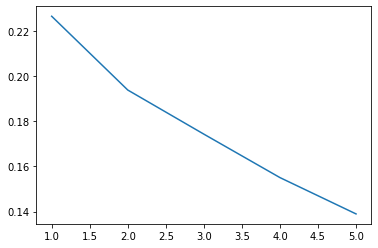

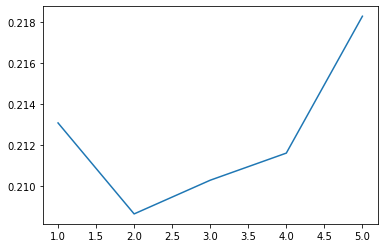

In [118]:
epochs=np.arange(1,6)
plt.figure(1)
plt.plot(epochs,history.history['loss'])
plt.figure(2)
plt.plot(epochs,history.history['val_loss'])

In [131]:
# Deep and wide network
from keras.layers import Concatenate, Dense, Dropout,LSTM
def RecommenderDeepWide(n_users, n_movies, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = Embedding(n_users, n_factors)(user)
    
    movie = Input(shape=(1,))
    m = Embedding(n_movies, n_factors)(movie)
    
    x1 = Concatenate()([user, movie])
    j=Dense(2,kernel_initializer='he_normal')(x1)
    j = Activation('relu')(j)
    j = Dropout(0.5)(j)

    x = Concatenate()([u,m])
    x = Dropout(0.05)(x)
    
    x=LSTM(100,recurrent_initializer='glorot_uniform')(x)
    x = Dropout(0.5)(x)
    
    #x=[x,j]
    x = Concatenate()([x,j])
    
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
    model = Model(inputs=[user, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    model.summary()
    return model

In [132]:
model = RecommenderDeepWide(n_users, n_movies,n_factors=256, min_rating=0, max_rating=1)


Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_50 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_51 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_64 (Embedding)        (None, 1, 256)       256000      input_50[0][0]                   
__________________________________________________________________________________________________
embedding_65 (Embedding)        (None, 1, 256)       2560000     input_51[0][0]                   
____________________________________________________________________________________________

In [135]:
history = model.fit(x=X_train_array, y=y_train, batch_size=64, epochs=2,
                    verbose=1, validation_data=(X_test_array, y_test))

Train on 96163 samples, validate on 13871 samples
Epoch 1/2
96163/96163 [==============================] - 62s 645us/step - loss: 0.1507 - val_loss: 0.2226
Epoch 2/2
96163/96163 [==============================] - 61s 631us/step - loss: 0.1288 - val_loss: 0.2307
